# MLE Consistency

In the lectures, we saw that one of the nice properties of maximum likelihood estimates is that they are consistent. This means that essentially with more data points included in the likelihood, the estimates of parameters will converge to the true parameter values. 

As an example, suppose we want to estimate the two parameters $(\mu,\sigma)$ of a normal distribution, $\phi(X;\mu,\sigma)$ given a set of observations $X_{1},X_{2},...,X_{N}$. The likelihood function is,

$$
q(\mu,\sigma) = -2\sum_{i=1}^{N}\ln\left( \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{X_{i}-\mu}{\sigma}\right)^{2}}\right) \\= N\ln(\sigma\sqrt{2\pi})+\sum_{i=1}^{N}\left(\frac{X_{i}-\mu}{\sigma}\right)^{2}
$$

In [1]:
%matplotlib notebook

import numpy
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

def q(params_list = []):
   mu    = params_list[0]
   sigma = params_list[1]
   N = len(data)
   sum_part = sum( [ ((x-mu)/sigma)**2 for x in data ] )
   return 2*N*numpy.log(sigma*((2*numpy.pi)**0.5)) + sum_part

Suppose the true values are $\mu_0$ and $\sigma_0$. 

In [2]:
# true values
mu_0     = 4.0
sigma_0  = 2.0

We can generate $N$ values of $X$ and find the maximum likelihood estimates $\hat{\mu}$ and $\hat{\sigma}$ for increasing values of $N$. 

We’ll use the minimize function from the `scipy.optimize` package.

In [3]:
from scipy.optimize import minimize

# empty list of data for now
data = [] 

# inital values for mu, sigma
init_params = [mu_0,sigma_0]
bounds  = [(-10,10),(0.01,10)]
# generate random data
steps = [5,10,20, 50, 100, 200, 500, 1000, 5000, 10000, 20000]
hat_mu = []; hat_sigma = []
for N in steps: 
  data = numpy.random.normal(mu_0,sigma_0,size=N)
  mle = minimize(q,init_params,bounds=bounds)
  hat_mu.append(mle.x[0])
  hat_sigma.append(mle.x[1])

And plot the results ...

<IPython.core.display.Javascript object>


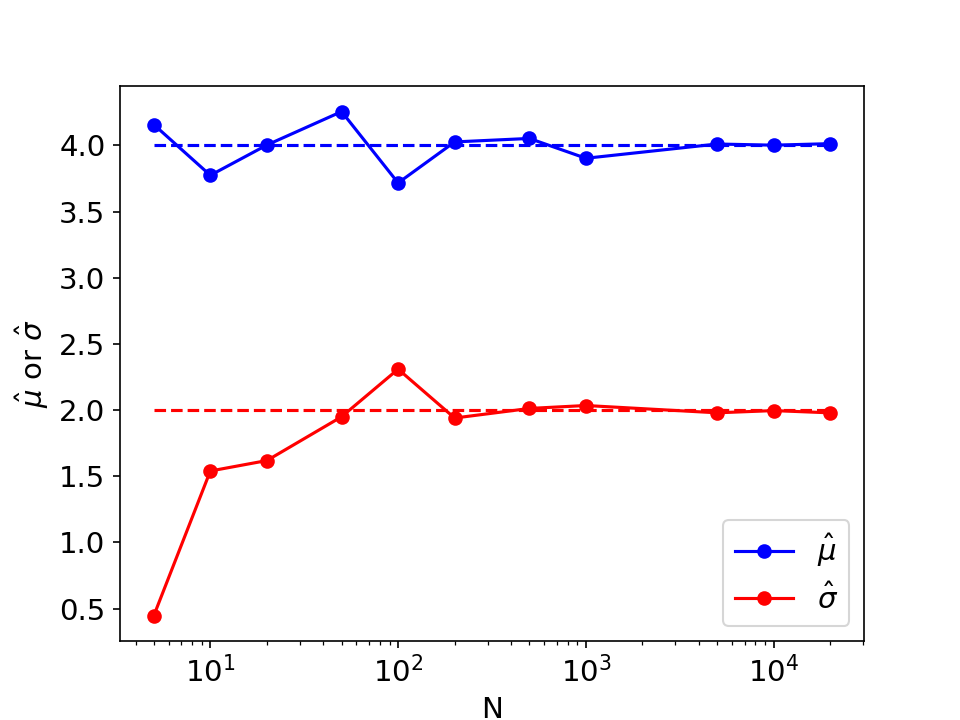

In [4]:
plt.plot(steps,hat_mu,color='blue',marker="o",label="$\hat{\mu}$")
plt.plot(steps,hat_sigma,color='red',marker="o",label="$\hat{\sigma}$")

plt.plot(steps,[mu_0 for s in steps],color='blue',linestyle="--")
plt.plot(steps,[sigma_0 for s in steps],color='red',linestyle="--")

plt.xlabel("N")
plt.ylabel("$\hat{\mu}$ or $\hat{\sigma}$")

plt.xscale('log')
plt.legend()
plt.show()

As expected, as $N$ gets llarger, the maximum likelihood estimators for $\mu$ and $\sigma$ get closer to the true values $\mu_0$ and $\sigma_0$. 

Try with other true values and check if the same holds. 